# <center>CSC 328 Practical Question 3</center>
## <center>Wakhisi Kevin Wasike</center>
## <center>P15/1928/2020</center>

Data for this practical was gotten from [UCI Machine Learning Repository: Online Retail Data Set](https://archive.ics.uci.edu/ml/datasets/online+retail).

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.

This is what has been used to create the star, galaxy and snowflake schemas. The csv file has the following columns:

1. invoice\_no
2. stock\_code
3. description
4. quantity
5. invoice\_date
6. unit\_price
7. customer\_id
8. country

The tool that has been employed in this practical is Python - libraries for data science, analytics and visualization.
Each visualization answers a specific business question.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

Load the dataset.

In [2]:
data = pd.read_csv('online_retail.csv')

### How are our sales performing across different product categories?

A <b style="color: red">dashboard</b> displaying key performance indicators (KPIs) such as total sales revenue, sales growth, and sales by product category in the form of bar charts, line graphs, and pie charts.

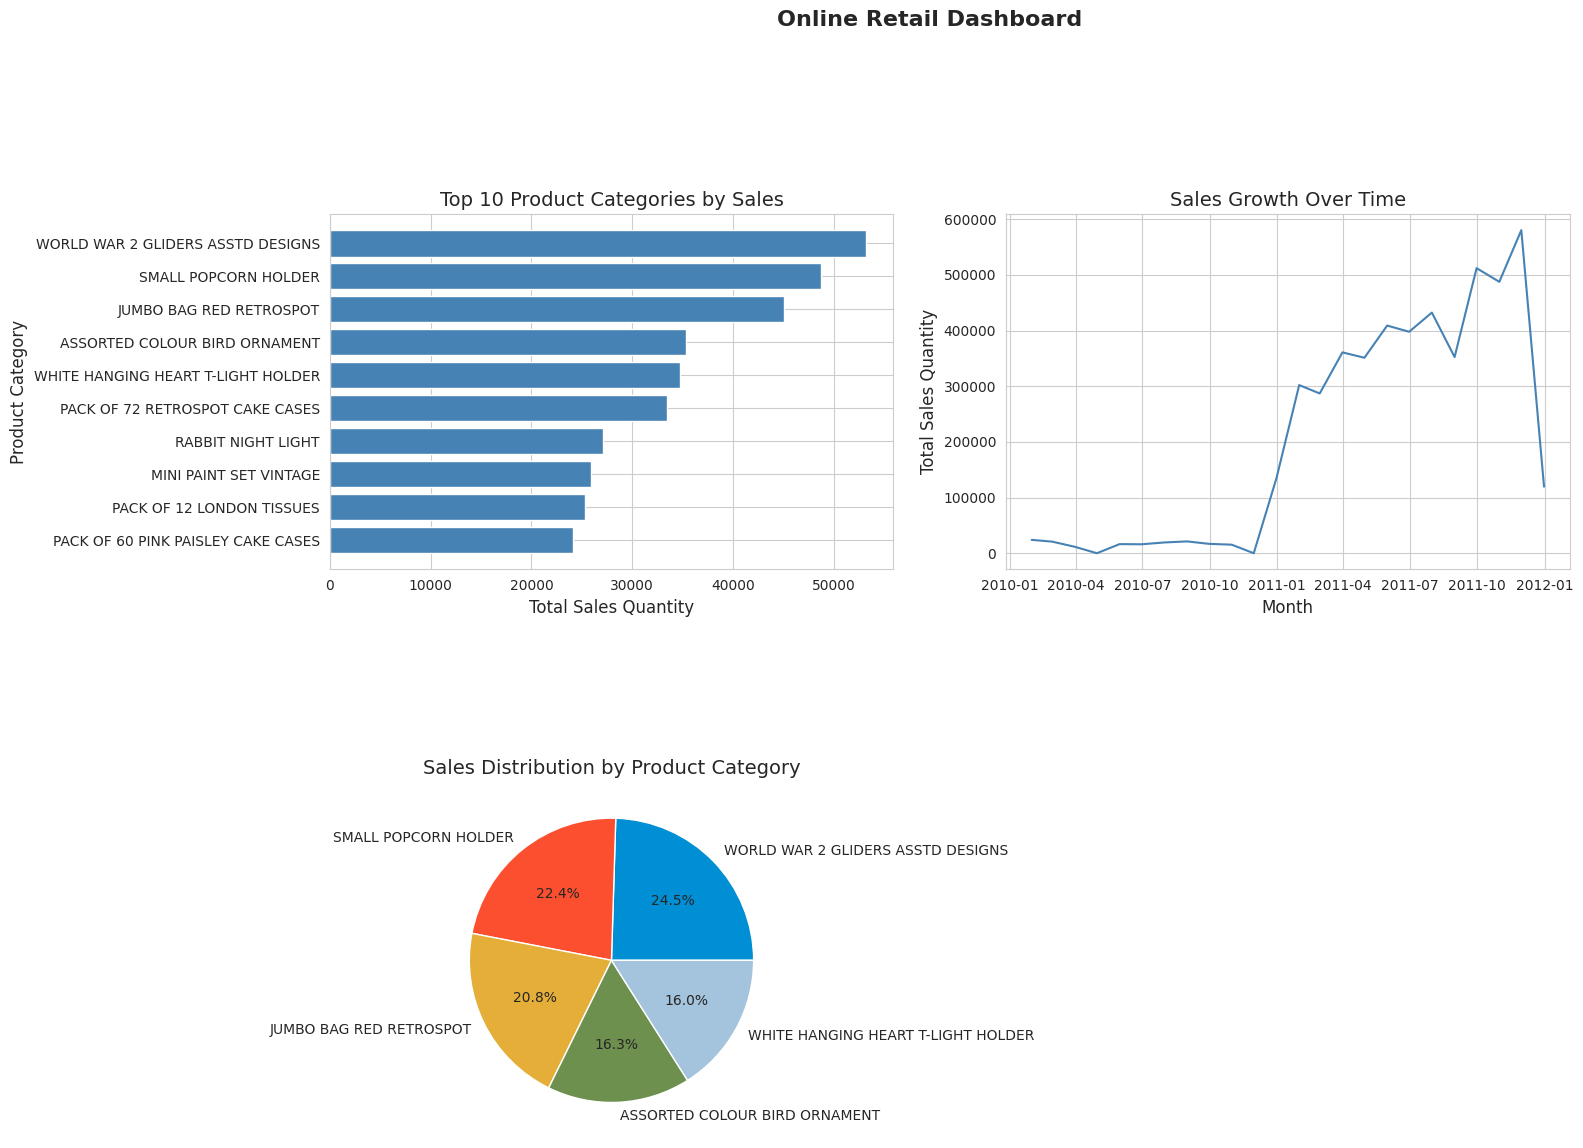

In [3]:
# Create subplots for the dashboard
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.6)

# Group data by product category and calculate total sales revenue
sales_by_category = data.groupby('Description')['Quantity'].sum()

# Plot horizontal bar chart of sales by product category
axes[0, 0].barh(sales_by_category.sort_values(ascending=False).head(10).index,
               sales_by_category.sort_values(ascending=False).head(10).values,
               color='steelblue')
axes[0, 0].set_xlabel('Total Sales Quantity', fontsize=12)
axes[0, 0].set_ylabel('Product Category', fontsize=12)
axes[0, 0].set_title('Top 10 Product Categories by Sales', fontsize=14)
axes[0, 0].invert_yaxis()  # Invert the y-axis for a descending order effect

# Plot line graph of sales growth over time
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format='%d/%m/%Y %H:%M')
monthly_sales = data.resample('M', on='InvoiceDate')['Quantity'].sum()


axes[0, 1].plot(monthly_sales.index, monthly_sales.values, color='steelblue')
axes[0, 1].set_xlabel('Month', fontsize=12)
axes[0, 1].set_ylabel('Total Sales Quantity', fontsize=12)
axes[0, 1].set_title('Sales Growth Over Time', fontsize=14)

# Plot pie chart of sales distribution by product category
axes[1, 0].pie(sales_by_category.sort_values(ascending=False).head(5).values,
               labels=sales_by_category.sort_values(ascending=False).head(5).index,
               autopct='%1.1f%%',
               colors=['#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#a3c4dc'])
axes[1, 0].set_title('Sales Distribution by Product Category', fontsize=14)

# Hide the empty subplot
axes[1, 1].axis('off')

# Add a title to the overall dashboard
fig.suptitle('Online Retail Dashboard', fontsize=16, fontweight='bold', y=1.05)

# Save the dashboard as an image file (optional)
plt.savefig('online_retail_dashboard.png', dpi=300)

# Show the dashboard
plt.show()


### Which geographic regions have the highest concentration of our customers?

A <b style="color: red">heat map</b> showing customer density based on their geographical locations. The intensity of color or shading would represent the concentration of customers in different regions.

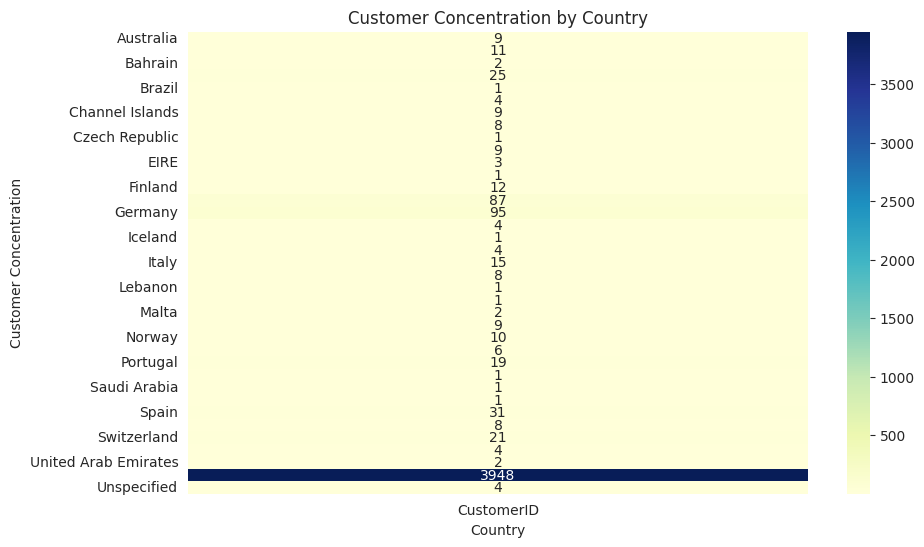

In [4]:
# Group data by country and calculate the number of unique customers
customer_by_country = data.groupby('Country')['CustomerID'].nunique()

# Plotting a heat map for customer concentration by country
plt.figure(figsize=(10, 6))
sns.heatmap(pd.DataFrame(customer_by_country), cmap='YlGnBu', annot=True, fmt='g')
plt.xlabel('Country')
plt.ylabel('Customer Concentration')
plt.title('Customer Concentration by Country')
plt.show()

### How are our website visitors behaving throughout the day?

 A <b style="color: red">fever chart</b> displaying website traffic and engagement metrics over a 24-hour period. The X-axis represents time, and the Y-axis shows the number of visitors or engagement metrics such as page views, bounce rate, or average session duration.

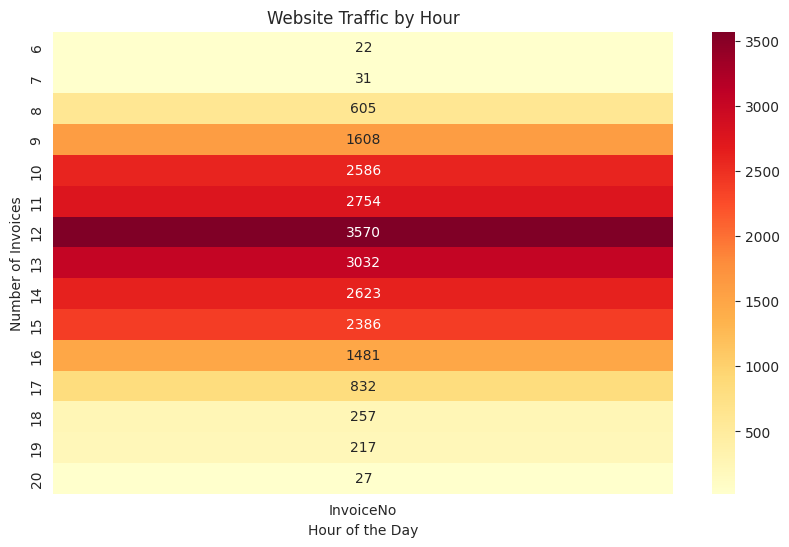

In [5]:
# Extract hour from InvoiceDate
data['Hour'] = data['InvoiceDate'].dt.hour

# Calculate total number of invoices by hour
invoices_by_hour = data.groupby('Hour')['InvoiceNo'].nunique()

# Plot the fever chart
plt.figure(figsize=(10, 6))
sns.heatmap(pd.DataFrame(invoices_by_hour), cmap='YlOrRd', annot=True, fmt='d')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Invoices')
plt.title('Website Traffic by Hour')
plt.show()

### What is the current customer loyalty rate?

A <b style="color: red">dial gauge</b> displaying the customer loyalty rate as a percentage. The gauge needle would point to the corresponding loyalty rate on a scale from 0% to 100%, providing an instant visual representation of customer loyalty.

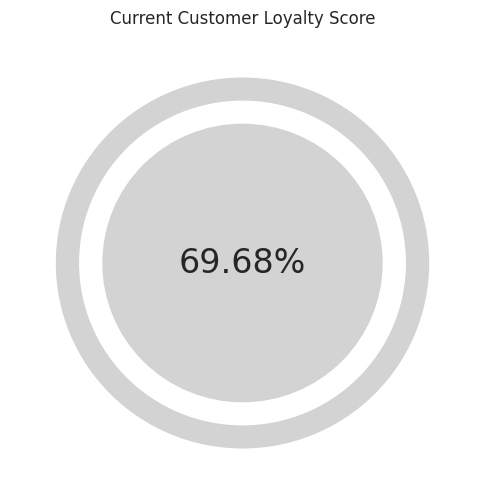

In [6]:
# Calculate the total number of unique customers
total_customers = data['CustomerID'].nunique()

# Calculate the number of customers who made repeat purchases
repeat_customers = data.groupby('CustomerID')['InvoiceNo'].nunique().gt(1).sum()

# Calculate the loyalty score or customer retention rate
loyalty_score = (repeat_customers / total_customers) * 100

# Creating a dial gauge to display the current customer loyalty score
plt.figure(figsize=(6, 6))
plt.gca().add_patch(plt.Circle((0.5, 0.5), 0.4, color='lightgray'))
plt.gca().add_patch(plt.Circle((0.5, 0.5), 0.35, color='white'))
plt.gca().add_patch(plt.Circle((0.5, 0.5), 0.3, color='lightgray'))
plt.text(0.5, 0.5, f'{loyalty_score:.2f}%', ha='center', va='center', fontsize=24)
plt.axis('off')
plt.title('Current Customer Loyalty Score')
plt.show()